In [1]:
# Autor Zhibin Zhao （ZZB)
# For co-simulation, FID CPMG or arbitrary Pulse sequence testing
# Please use it when Debug Hardware ADC and DAC pass

# import library
from pynq import Overlay
from pynq import allocate
import numpy as np
import matplotlib.pyplot as mp

## Config

In [2]:
ol = Overlay('./HVNMR.bit')

In [3]:
# loading IP
pulse_gen = ol.fpga_pulse_generator_0
osci = ol.fpga_tracing_0
chip_conf = ol.fpga_nmr_chip_config_0

# config ADCs
adc0 = ol.fpga_ADC_AD7960_0
adc1 = ol.fpga_ADC_AD7960_1
mode = 9
adc0.write(0x0,mode)  
adc1.write(0x0,mode)

In [4]:
# pulse generator don't change it

# start the pulse sequence
C_SEQUENCE_GENERATOR_EN = 0x0

# set the number of section
C_SET_NR_SECTIONS = 0x4

# write section select
C_SEL_SECTION = 0x8

# set section type
C_SET_SECTION_TYPE = 0xC

# set section duration
C_SET_DELAY = 0x10

# set section muxplexer
C_SET_MUX = 0x14

# set repetition start section pointer
C_SET_START_REPEAT_POINTER = 0x18

# set repetition end section pointer
C_SET_END_REPEAT_POINTER = 0x1C

# set cycle repetition number
C_SET_CYCLE_REPETITION_NUMBER = 0x20

# set experiment repetition number
C_SET_EXPERIMENT_REPETITION_NUMBER = 0x24

# channel 0 set phase
C_SET_PHASE_CH0 = 0x28

# channel 0 set frequency
C_SET_FREQUENCY_CH0 = 0x2C

# channel 1 set phase
C_SET_PHASE_CH1 = 0x30

# channel 1 set frequency
C_SET_FREQUENCY_CH1 = 0x34

# DDS reset
C_SET_RESETN_DDS = 0x38

# channel busy signal
C_GET_BUSY = 0x3C

# channel data ready signal
C_GET_DATA_READY = 0x40

# set number of DDS channel
C_GET_NR_DDS_CH = 0x44

# set memory depth
C_GET_MEM_DEPTH = 0x48

# set number of activity
C_GET_NR_ACTIVITY = 0x4C

# start
# C_START = 80   # 0x50

# write configuration data or experiment execution command
SetCommand = lambda command, value: pulse_gen.write(command, value)

# read data from pulse generator IP core
GetData = lambda command: pulse_gen.read(command)


def Sec_Config(sec, s_type, delay, mux, p0, f0, p1, f1, rstn):
    # choose section to configure
    SetCommand(C_SEL_SECTION, sec)
    # define section type
    SetCommand(C_SET_SECTION_TYPE, s_type)
    # define delay duration
    SetCommand(C_SET_DELAY, delay)
    # define multiplexer type
    SetCommand(C_SET_MUX, mux)
    # DDS channel 0 phase
    SetCommand(C_SET_PHASE_CH0, p0)
    # DDS channel 0 frequency
    SetCommand(C_SET_FREQUENCY_CH0, f0)
    # DDS channel 1 phase
    SetCommand(C_SET_PHASE_CH1, p1)
    # DDS channel 1 frequency
    SetCommand(C_SET_FREQUENCY_CH1, f1)
    # Reset
    SetCommand(C_SET_RESETN_DDS, rstn)


def Exp_Config():
    SetCommand(C_SET_NR_SECTIONS, section_nr)

    SetCommand(C_SET_START_REPEAT_POINTER, start_pointer)

    SetCommand(C_SET_END_REPEAT_POINTER, end_pointer)

    SetCommand(C_SET_CYCLE_REPETITION_NUMBER, cycle_repetition_number)

    SetCommand(C_SET_EXPERIMENT_REPETITION_NUMBER, experiment_repetition_number)

In [5]:
# tracing module
# enable
C_ENABLE_CMD = 0*4

def enable():
    osci.write(C_ENABLE_CMD,1)
    
def disable():
    osci.write(C_ENABLE_CMD,0)
    
# run the single shot
C_SINGLE_SHOT_CMD = 1*4
def single_shot():
    osci.write(C_SINGLE_SHOT_CMD,1)
    
# select the analog trigger chanel 
C_SELECT_ANALOG_TRIGGER_CHANNEL_CMD = 2*4
def trigger_channel(data):
    osci.write(C_SELECT_ANALOG_TRIGGER_CHANNEL_CMD,data)
    
# set the analog trigger edge rising edge or falling edge enable
C_SET_ANALOG_TRIGGER_RISING_EDGE_CMD = 3*4
def trigger_ris_edge():
    osci.write(C_SET_ANALOG_TRIGGER_RISING_EDGE_CMD,1)
    
# set the analog trigger edge falling edge or falling edge enable
C_SET_ANALOG_TRIGGER_FALLING_EDGE_CMD = 4*4
def trigger_fal_edge():
    osci.write(C_SET_ANALOG_TRIGGER_FALLING_EDGE_CMD,1)
    
# set the digital chanle trigger rising edge enable 
C_BIN_CH_RE_TRIG_EN_CMD = 5*4
def digtal_trigger_ris_edge():
    osci.write(C_BIN_CH_RE_TRIG_EN_CMD,1)
    
# set the digital chanel trigger falling edge enable
C_BIN_CH_FE_TRIG_EN_CMD = 6*4
def digtal_trigger_fal_edge():
    osci.write(C_BIN_CH_FE_TRIG_EN_CMD,1)
    
# arm (register interface)
C_ARM_CMD = 7*4
def arm():
    osci.write(C_ARM_CMD,1)
    
# set the number of sumples, max 2^ memory depth
C_SET_NR_SAMPLES_CMD = 8*4
def set_nr_smaples(data):
    osci.write(C_SET_NR_SAMPLES_CMD,data)
    
# set clock size Program Logic clock over the step of size
C_CLOCK_STEP_SIZE_CMD = 9*4
def clock_step_size(data):
    osci.write(C_CLOCK_STEP_SIZE_CMD,data)
    
# trigger delay function using for the trigger center for ploting
C_SET_TRIGGER_DELAY_CMD = 10*4
def trigger_delay(data):
    osci.write(C_SET_TRIGGER_DELAY_CMD,data)
    
# select the read memory from channel 
C_SELECT_READ_MEMORY_CMD = 11*4
def select_read_memory(data):
    osci.write(C_SELECT_READ_MEMORY_CMD,data)
    
# set the current read address for block ram
C_SET_CURRENT_READ_ADDRESS_CMD = 12*4
def reset_current_read_addr():
    osci.write(C_SET_CURRENT_READ_ADDRESS_CMD,0)
def set_read_addr(data):
    osci.write(C_SET_CURRENT_READ_ADDRESS_CMD,data)
    
# read data
C_READ_DATA = 13*4
def rd_date():
    data = osci.read(C_READ_DATA)
    return data
# get the number of the analog channels
C_GET_NR_ANALOG_CHANNELS_CMD = 14*4
def get_nr_AnalogChannel():
    data = osci.read(C_GET_NR_ANALOG_CHANNELS_CMD)
    print (f"Number of analog channels by VHDL setting:{data}")

# get the number of digital channels
C_GET_NR_DIGITAL_CHANNELS_CMD = 15*4
def get_nr_DigitalChannel():
    data = osci.read(C_GET_NR_DIGITAL_CHANNELS_CMD)
    print (f"Number of digital channels by VHDL setting:{data}")

# get the number of analog memories
C_GET_NR_ANALOG_MEMORIES_CMD = 16*4
def get_nr_AnalogMemories():
    data = osci.read(C_GET_NR_ANALOG_MEMORIES_CMD)
    print (f"Number of analog memory:{data}")    

# get the number of digital meories
C_GET_NR_DIGITAL_MEMORIES_CMD = 17*4
def get_nr_DigitalMemories():
    data = osci.read(C_GET_NR_DIGITAL_MEMORIES_CMD)
    print (f"Number of digital memory:{data}")        

# get the memory depth of analog channel
C_GET_MEMORY_DEPTH_CMD = 18*4
def get_nr_MemDepth():
    data = osci.read(C_GET_MEMORY_DEPTH_CMD)
    print (f"Memory depth:{data}")        

# read the busy of block
C_READ_BUSY_SIGNAL_CMD = 19*4
def busy():
    data = osci.read(C_READ_BUSY_SIGNAL_CMD)
    print (f"busy:{data}") 

# read the rady signal 
C_READ_READY_SIGNAL_CMD = 20*4
def ready():
    data = osci.read(C_READ_READY_SIGNAL_CMD)
    print (f"ready:{data}")     

# toggle the led
C_TOGGLE_LED_CMD = 21*4
def led():
    osci.write(C_TOGGLE_LED_CMD,1)
    
# set the analog trigger threshold voltage
C_SET_ANALOG_TRIGGER_THRESHOLD_CMD = 22*4
def trigger_threshold(data):
    osci.write(C_SET_ANALOG_TRIGGER_THRESHOLD_CMD,data)
    
# control mux select analog memory
C_CTRL_MUX_SELECT_ANALOG_MEMORY_CMD = 23*4
def mux_Memory(data):
    osci.write(C_CTRL_MUX_SELECT_ANALOG_MEMORY_CMD,data)
    
# control mux select analog channel  
C_CTRL_MUX_SELECT_ANALOG_CH_CMD = 24*4
def mux_Channel(data):
    osci.write(C_CTRL_MUX_SELECT_ANALOG_CH_CMD,data)

# set the number of rx pulse
C_SET_STREAM_NR_RX_PULSE = 25*4
def set_stream_number_rx_pulse(data):
    osci.write(C_SET_STREAM_NR_RX_PULSE,data)
    
# start stream transfer
C_START_STREAM = 26*4
def start_stream_transfer():
    osci.write(C_START_STREAM,1)
    
# type of stream arm 0 single shot 1
C_TYPE_STREAM = 27*4
def type_stream(data):
    osci.write(C_TYPE_STREAM,data)
    
# read total rest samples    
C_REST_SAMPLES = 28*4
def rest_samples():
    data = osci.read(C_REST_SAMPLES)
    print (f"rest samples:{data}")

# read stream busy
C_READ_STREAM_BUSY = 29*4
def stream_busy():
    data = osci.read(C_READ_STREAM_BUSY)
    print (f"stream busy:{data}")
    

In [6]:
# HVNMR CHIP config
# Constants
register_width = 32

# Register 0 and 2 are for SPI data
# Register 1 is for start the transmission
# Register 3 is for read out of done signal

Address_register_SPI_data = tuple(x * 4 for x in (0, 2))
Address_register_start = 1 * 4
Address_register_done = 3 * 4 # 末尾加,为元组

# Sub-adress of SPI configuration under Register 0 and 2, 55 bits in total

sub_addr_array = [
    0,   # Sub_Address_SPI_pll_en
    1,   # Sub_Address_SPI_gain
    2,   # Sub_Address_SPI_skip_mixer
    3,   # Sub_Address_SPI_prescaler_pll
    5,   # Sub_Address_SPI_N_divider_pll
    10,  # Sub_Address_SPI_prescaler_tx_logic
    12,  # Sub_Address_SPI_tx_shortening_counter
    20,  # Sub_Address_SPI_deadtime_hs_p
    24,  # Sub_Address_SPI_deadtime_ls_p
    28,  # Sub_Address_SPI_deadtime_hs_n
    32,  # Sub_Address_SPI_deadtime_ls_n
    36,  # Sub_Address_SPI_deadtime_comp_p
    40,  # Sub_Address_SPI_deadtime_comp_n
    44,  # Sub_Address_SPI_delay_p
    48,  # Sub_Address_SPI_delay_n
    52,  # Sub_Address_SPI_amplifier_reset
    53,  # Sub_Address_SPI_pll_or_spi_output
    54   # Sub_Address_SPI_ls
]

# 18 SPI configuration commands in total

Sub_Address_SPI_pll_en = 0
Sub_Address_SPI_gain = 1
Sub_Address_SPI_skip_mixer = 2
Sub_Address_SPI_prescaler_pll = 3
Sub_Address_SPI_N_divider_pll = 4
Sub_Address_SPI_prescaler_tx_logic = 5
Sub_Address_SPI_tx_shortening_counter = 6
Sub_Address_SPI_deadtime_hs_p = 7
Sub_Address_SPI_deadtime_ls_p = 8
Sub_Address_SPI_deadtime_hs_n = 9
Sub_Address_SPI_deadtime_ls_n = 10
Sub_Address_SPI_deadtime_comp_p = 11
Sub_Address_SPI_deadtime_comp_n = 12
Sub_Address_SPI_delay_p = 13
Sub_Address_SPI_delay_n = 14
Sub_Address_SPI_amplifier_reset = 15
Sub_Address_SPI_pll_or_spi_output = 16
Sub_Address_SPI_ls = 17
# Basic functions

# Read whole register value
def read_register(address):
    return chip_conf.read(address)

# Write whole register value
def write_register(address, val):
    return chip_conf.write(address, val)

# Clear all registers
def clear_register():
    chip_conf.write(Address_register_SPI_data[0], 0)
    chip_conf.write(Address_register_SPI_data[1], 0)
    chip_conf.write(Address_register_start, 0)
    chip_conf.write(Address_register_done, 0)

# Read SPI data register sub-function value
def read_spi_sub_address(sub_address):
    cur = chip_conf.read(Address_register_SPI_data[1]) + 2**32 * chip_conf.read(Address_register_SPI_data[0])
    if (sub_address == 17):
        len = 1
    else:
        len = sub_addr_array[sub_address + 1] - sub_addr_array[sub_address]
    result = (cur >> (9 + sub_addr_array[sub_address])) % (2**len)
    return result
    
# Read SPI data register specific bit value
def read_bit(address, bit):
    pass
    
# Write SPI data register sub-function value
def write_spi_sub_address(sub_address, set_val):
    address = Address_register_SPI_data[0] if sub_addr_array[sub_address] > 22 else Address_register_SPI_data[1]  # firstly find out whether the subaddress in register 0 or 2
    cur_0 = read_register(Address_register_SPI_data[0])
    cur_2 = read_register(Address_register_SPI_data[1])
    if (sub_address == Sub_Address_SPI_deadtime_hs_p): # special, need change both register 0 and 2
        print("Command in both register 0 and register 2.")
        print(4)
        if (set_val >= 8):
            masked = cur_0 & (2 ** register_width - 1 - 1)
            result_0 = masked | 1
            set_val = set_val - 8
            # print(set_val)
        else:
            masked = cur_0 & (2 ** register_width - 1 - 1)
            result_0 = masked
        chip_conf.write(Address_register_SPI_data[0], result_0)
        max_val = 7
        set_val = set_val if (set_val<=max_val) else max_val
        print(set_val)
        masked = cur_2 & (2 ** register_width - 1 - (max_val << 29))
        result_2 = masked | (set_val << 29)
        chip_conf.write(Address_register_SPI_data[1], result_2)
    else:
        if (sub_address == 17):
            len = 1
        else:
            len = sub_addr_array[sub_address + 1] - sub_addr_array[sub_address]
        print(len)
        max_val = 2 ** len - 1
        if (set_val > max_val):
            set_val = max_val
        if (address == Address_register_SPI_data[1]):
            masked = cur_2 & (2 ** register_width - 1 - (max_val << (sub_addr_array[sub_address] + 9)))
            result_2 = masked | (set_val << (sub_addr_array[sub_address] + 9))
            chip_conf.write(Address_register_SPI_data[1], result_2)
        else:
            masked = cur_0 & (2 ** register_width - 1 - (max_val << (sub_addr_array[sub_address] - 23)))
            result_0 = masked | (set_val << (sub_addr_array[sub_address] - 23))
            chip_conf.write(Address_register_SPI_data[0], result_0)
    return

def spi_write_start(val): # rising edge trigger
    chip_conf.write(Address_register_start, val)
    
def spi_read_finish(): # spi finish signal
    chip_conf.read(Address_register_done)
# Bit 0: internal PLL
def spi_read_pll_en():
    return read_spi_sub_address(Sub_Address_SPI_pll_en)
def spi_write_pll_en(val):
    return write_spi_sub_address(Sub_Address_SPI_pll_en, val)

# Bit 1: gain
def spi_read_gain():
    return read_spi_sub_address(Sub_Address_SPI_gain)
def spi_write_gain(val):
    return write_spi_sub_address(Sub_Address_SPI_gain, val)

# Bit 2: skip_mixer
def spi_read_skip_mixer():
    return read_spi_sub_address(Sub_Address_SPI_skip_mixer)
def spi_write_skip_mixer(val):
    return write_spi_sub_address(Sub_Address_SPI_skip_mixer, val)

# Bit 3-4: prescaler_pll
def spi_read_prescaler_pll():
    return read_spi_sub_address(Sub_Address_SPI_prescaler_pll)
def spi_write_prescaler_pll(val):
    return write_spi_sub_address(Sub_Address_SPI_prescaler_pll, val)

# Bit 5-9: N_divider_pll
def spi_read_N_divider_pll():
    return read_spi_sub_address(Sub_Address_SPI_N_divider_pll)
def spi_write_N_divider_pll(val):
    return write_spi_sub_address(Sub_Address_SPI_N_divider_pll, val)

# Bit 10-11: prescaler_tx_logic
def spi_read_prescaler_tx_logic():
    return read_spi_sub_address(Sub_Address_SPI_prescaler_tx_logic)
def spi_write_prescaler_tx_logic(val):
    return write_spi_sub_address(Sub_Address_SPI_prescaler_tx_logic, val)

# Bit 12-19: tx_shortening_counter
def spi_read_tx_shortening_counter():
    return read_spi_sub_address(Sub_Address_SPI_tx_shortening_counter)
def spi_write_tx_shortening_counter(val):
    return write_spi_sub_address(Sub_Address_SPI_tx_shortening_counter, val)

# Bit 20-23: deadtime_hs_p
def spi_read_deadtime_hs_p():
    return read_spi_sub_address(Sub_Address_SPI_deadtime_hs_p)
def spi_write_deadtime_hs_p(val):
    return write_spi_sub_address(Sub_Address_SPI_deadtime_hs_p, val)

# Bit 24-27: deadtime_ls_p
def spi_read_deadtime_ls_p():
    return read_spi_sub_address(Sub_Address_SPI_deadtime_ls_p)
def spi_write_deadtime_ls_p(val):
    return write_spi_sub_address(Sub_Address_SPI_deadtime_ls_p, val)

# Bit 28-31: deadtime_hs_n
def spi_read_deadtime_hs_n():
    return read_spi_sub_address(Sub_Address_SPI_deadtime_hs_n)
def spi_write_deadtime_hs_n(val):
    return write_spi_sub_address(Sub_Address_SPI_deadtime_hs_n, val)

# Bit 32-35: deadtime_ls_n
def spi_read_deadtime_ls_n():
    return read_spi_sub_address(Sub_Address_SPI_deadtime_ls_n)
def spi_write_deadtime_ls_n(val):
    return write_spi_sub_address(Sub_Address_SPI_deadtime_ls_n, val)

# Bit 36-39: deadtime_comp_p
def spi_read_deadtime_comp_p():
    return read_spi_sub_address(Sub_Address_SPI_deadtime_comp_p)
def spi_write_deadtime_comp_p(val):
    return write_spi_sub_address(Sub_Address_SPI_deadtime_comp_p, val)

# Bit 40-43: deadtime_comp_n
def spi_read_deadtime_comp_n():
    return read_spi_sub_address(Sub_Address_SPI_deadtime_comp_n)
def spi_write_deadtime_comp_n(val):
    return write_spi_sub_address(Sub_Address_SPI_deadtime_comp_n, val)

# Bit 44-47: delay_p
def spi_read_delay_p():
    return read_spi_sub_address(Sub_Address_SPI_delay_p)
def spi_write_delay_p(val):
    return write_spi_sub_address(Sub_Address_SPI_delay_p, val)

# Bit 48-51: delay_n
def spi_read_delay_n():
    return read_spi_sub_address(Sub_Address_SPI_delay_n)
def spi_write_delay_n(val):
    return write_spi_sub_address(Sub_Address_SPI_delay_n, val)

# Bit 52: amplifier_reset
def spi_read_amplifier_reset():
    return read_spi_sub_address(Sub_Address_SPI_amplifier_reset)
def spi_write_amplifier_reset(val):
    return write_spi_sub_address(Sub_Address_SPI_amplifier_reset, val)

# Bit 53: pll_or_spi_output
def spi_read_pll_or_spi_output():
    return read_spi_sub_address(Sub_Address_SPI_pll_or_spi_output)
def spi_write_pll_or_spi_output(val):
    return write_spi_sub_address(Sub_Address_SPI_pll_or_spi_output, val)

# Bit 54: ls
def spi_read_ls():
    return read_spi_sub_address(Sub_Address_SPI_ls)
def spi_write_ls(val):
    return write_spi_sub_address(Sub_Address_SPI_ls, val)



In [7]:
import time

###############################
pll_flag = 0 # pll
gain_flag = 0 # if amp
mixer_flag = 0 # mixer

pll_pre = 3
pll_div = 0
tx_pre = 2
tx_cnt = 200
dt_hs_p = 0
dt_ls_p = 0
dt_hs_n = 0
dt_ls_n = 0
dt_comp_p = 0
dt_comp_n = 0
delay_p = 0
delay_n = 0

pll_divider = 1
if pll_pre == 0:
    pll_divider = 64
elif pll_pre == 1:
    pll_divider = 32
elif pll_pre == 2:
    pll_divider = 16
elif pll_pre == 3:
    pll_divider = 8
elif pll_pre == 4:
    pll_divider = 4
elif pll_pre == 5:
    pll_divider = 2
elif pll_pre == 6:
    pll_divider = 1
elif pll_pre == 8:
    pll_divider = 0.5
else:
    pll_divider = 1
    
print(f"pll divider of: {pll_divider}")

###############################
# first
clear_register() 
spi_write_pll_en(pll_flag)
spi_write_gain(gain_flag)
spi_write_skip_mixer(mixer_flag)   
spi_write_prescaler_pll(pll_pre)    
spi_write_N_divider_pll(pll_div)
spi_write_prescaler_tx_logic(tx_pre)
spi_write_tx_shortening_counter(tx_cnt)    
spi_write_deadtime_hs_p(dt_hs_p)
spi_write_deadtime_ls_p(dt_ls_p)
spi_write_deadtime_hs_n(dt_hs_n)
spi_write_deadtime_ls_n(dt_ls_n)
spi_write_deadtime_comp_p(dt_comp_p)
spi_write_deadtime_comp_n(dt_comp_n)
spi_write_delay_p(delay_p)
spi_write_delay_n(delay_n)
spi_write_amplifier_reset(1)
spi_write_start(1)
time.sleep(1)

# second
clear_register() 
spi_write_pll_en(pll_flag)
spi_write_gain(gain_flag)
spi_write_skip_mixer(mixer_flag)   
spi_write_prescaler_pll(pll_pre)    
spi_write_N_divider_pll(pll_div)
spi_write_prescaler_tx_logic(tx_pre)
spi_write_tx_shortening_counter(tx_cnt)    
spi_write_deadtime_hs_p(dt_hs_p)
spi_write_deadtime_ls_p(dt_ls_p)
spi_write_deadtime_hs_n(dt_hs_n)
spi_write_deadtime_ls_n(dt_ls_n)
spi_write_deadtime_comp_p(dt_comp_p)
spi_write_deadtime_comp_n(dt_comp_n)
spi_write_delay_p(delay_p)
spi_write_delay_n(delay_n)
spi_write_amplifier_reset(0)
spi_write_start(1)
time.sleep(1)

# third
clear_register() 
spi_write_pll_en(pll_flag)
spi_write_gain(gain_flag)
spi_write_skip_mixer(mixer_flag)   
spi_write_prescaler_pll(pll_pre)    
spi_write_N_divider_pll(pll_div)
spi_write_prescaler_tx_logic(tx_pre)
spi_write_tx_shortening_counter(tx_cnt)    
spi_write_deadtime_hs_p(dt_hs_p)
spi_write_deadtime_ls_p(dt_ls_p)
spi_write_deadtime_hs_n(dt_hs_n)
spi_write_deadtime_ls_n(dt_ls_n)
spi_write_deadtime_comp_p(dt_comp_p)
spi_write_deadtime_comp_n(dt_comp_n)
spi_write_delay_p(delay_p)
spi_write_delay_n(delay_n)
spi_write_amplifier_reset(0)
spi_write_start(1)
time.sleep(1)

pll divider of: 8
1
1
1
2
5
2
8
Command in both register 0 and register 2.
4
0
4
4
4
4
4
4
4
1
1
1
1
2
5
2
8
Command in both register 0 and register 2.
4
0
4
4
4
4
4
4
4
1
1
1
1
2
5
2
8
Command in both register 0 and register 2.
4
0
4
4
4
4
4
4
4
1


## CPMG

### Create CPMG sequences

In [8]:
# CPMG
# parameters of pulses setup
start_pointer = 4
end_pointer = 11
section_nr = 13

echos = 3

cycle_repetition_number = echos
experiment_repetition_number = 1

# defs
sys_clk_freq = 100  # MHz
dds_clk_freq = 250  # MHz
phase_width = 32  # see Vivado IP core configuration

t = sys_clk_freq  # 1us -- 100MHz system clock frequency
pi = 2147483648  # 180 degree, for 32 bits phase width
f0 = 17179869  # 1MHz, for 32 bits phase width

f_tx = 1.1  # in MHz
f_rx = 1.2  # in MHz

T_tx = 1 / f_tx  # in us
print(f"f_tx period: {T_tx}")
T_rx = 1 / f_rx  # in us

P90 = 10  # in us
P180 = 15  # in us
PRX = 5  # in us
TE = 40  # Echo Time

T_E = t * ((TE // (T_tx * 4)) * (T_tx * 4))
P_90 = t * ((P90 // (T_tx * 2)) * (T_tx * 2))
P_180 = t * ((P180 // (T_tx * 4)) * (T_tx * 4))
P_RX = t * (PRX - PRX%T_rx)

print(f"adjusted P90 from {P90} to {P_90 / t}. P90 TX periods: {P_90 / T_tx / t}")
print(f"adjusted P180 from {P180} to {P_180 / t}. P180 TX periods: {P_180 / T_tx / t}")
print(f"adjusted TE from {TE} to {T_E / t}. TE TX periods: {T_E / T_tx / t}")
print(f"adjusted PRX from {PRX} to {P_RX / t}. PRX TX periods: {P_RX / T_tx / t}. PRX TX periods: {P_RX / T_rx / t}.")

# ft = f0 * f_tx
# fr = f0 * f_rx
ft = int(f_tx * 1_000_000 * 2 * (2**phase_width) / 1e6 / dds_clk_freq)
fr = int(f_rx * 1_000_000 * 2 * (2**phase_width) / 1e6 / dds_clk_freq)

pulse_delay = t * 5 * T_tx
t0 = (T_E - P_90 - P_180) / 2 - pulse_delay
t1 = (T_E - P_RX - P_180) / 2 - pulse_delay * 2

sequence_list = ["a"]  # order of the sequences, remove keys to ignore

# sequence phase parameters in radians
cpmg_parms = {
    "a": {
        "phase_tx_90": 0,
        "phase_tx_180": 0,
        "phase_rx": 0,
    },
    "b": {
        "phase_tx_90": np.pi / 2,
        "phase_tx_180": np.pi / 2,
        "phase_rx": 0,
    },
    "c": {
        "phase_tx_90": 0,
        "phase_tx_180": 0,
        "phase_rx": 0,
    },
    "d": {
        "phase_tx_90": 0,
        "phase_tx_180": 0,
        "phase_rx": 0,
    },
}

sequences = {}

for k in sequence_list:
    sequences[k] = {
        "l_type": [],
        "l_delay": [],
        "l_mux": [],
        "l_p0": [],
        "l_f0": [],
        "l_p1": [],
        "l_f1": [],
        "l_rstn": [],
    }

    print(f"creating sequence params for sequence {k}")

    # calculate phases
    phase_factor = 11930465
    base_phase = 0
    p_90_phase_deg = (cpmg_parms[k]["phase_tx_90"] * 180 / np.pi) + base_phase
    p_180_phase_deg = (cpmg_parms[k]["phase_tx_180"] * 180 / np.pi) + base_phase
    rx_phase_deg = (cpmg_parms[k]["phase_rx"] * 180 / np.pi) + base_phase

    p_90_p = 2 * 8 * p_90_phase_deg * phase_factor / pll_divider
    p_180_p = 2 * 8 * p_180_phase_deg * phase_factor / pll_divider
    p_rx_p = 2 * 8 * rx_phase_deg * phase_factor / pll_divider
    base_p = 2 * 8 * base_phase * phase_factor / pll_divider

    sequences[k]["l_type"] = [2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2]
    sequences[k]["l_delay"] = [pulse_delay, pulse_delay, P_90, t0, pulse_delay, P_180, pulse_delay, t1, pulse_delay, P_RX, t1, pulse_delay, pulse_delay]
    sequences[k]["l_mux"] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]  # 0 = DDS1, 1 = DDS0
    sequences[k]["l_p0"] = [base_p, base_p, base_p, base_p, base_p, base_p, base_p, base_p, base_p, p_rx_p, base_p, base_p, base_p]
    sequences[k]["l_f0"] = [fr, fr, fr, fr, fr, fr, fr, fr, fr, fr, fr, fr, fr]
    sequences[k]["l_p1"] = [base_p, base_p, p_90_p, base_p, base_p, p_180_p, base_p, base_p, base_p, base_p, base_p, base_p, base_p]
    sequences[k]["l_f1"] = [ft, ft, ft, ft, ft, ft, ft, ft, ft, ft, ft, ft, ft]
    sequences[k]["l_rstn"] = [1,1,1,1,1,1,1,1,1,1,1,1,1]
    
    tx_time = sequences[k]["l_delay"][2] + cycle_repetition_number*sequences[k]["l_delay"][5]
    print(f"total tx FREF periods: {tx_time / (T_tx/2) / t}")

    t_total = sum(sequences[k]["l_delay"][0 : start_pointer - 1]) + cycle_repetition_number * sum(sequences[k]["l_delay"][start_pointer - 1 : end_pointer]) + sum(sequences[k]["l_delay"][end_pointer:section_nr])
    t_total = experiment_repetition_number * t_total / t
    print(f"sequence length: {t_total/1000} ms")
    print(f"sequnce FREF periods: {(t_total) / (T_tx / 2)}")

    sequences[k]["l_delay"][-1] = sequences[k]["l_delay"][-1] - t * (t_total%T_tx)

    t_total = sum(sequences[k]["l_delay"][0 : start_pointer - 1]) + cycle_repetition_number * sum(sequences[k]["l_delay"][start_pointer - 1 : end_pointer]) + sum(sequences[k]["l_delay"][end_pointer:section_nr])
    t_total = experiment_repetition_number * t_total / (t * 1000)
    print(f"adjusted sequence length: {t_total} ms")
    print(f"adjusted sequnce FREF periods: {t_total * 1000 / (T_tx / 2)}")

    for i in range(0, section_nr):
        sequences[k]["l_delay"][i] = int(sequences[k]["l_delay"][i])
        sequences[k]["l_p0"][i] = int(sequences[k]["l_p0"][i])
        sequences[k]["l_f0"][i] = int(sequences[k]["l_f0"][i])
        sequences[k]["l_p1"][i] = int(sequences[k]["l_p1"][i])
        sequences[k]["l_f1"][i] = int(sequences[k]["l_f1"][i])
        sequences[k]["l_rstn"][i] = int(sequences[k]["l_rstn"][i])

    for val in sequences[k].values():
        assert len(val) == section_nr

Exp_Config()

for k in sequences.keys():
    print(f"\n{str(k).capitalize()}")
    for key, val in sequences[k].items():
        print(f"{key}: {val}")

f_tx period: 0.45454545454545453
adjusted P90 from 10 to 10.0. P90 TX periods: 22.0
adjusted P180 from 15 to 14.545454545454545. P180 TX periods: 32.0
adjusted TE from 40 to 40.0. TE TX periods: 88.0
adjusted PRX from 5 to 4.782608695652175. PRX TX periods: 10.521739130434785. PRX TX periods: 11.000000000000002.
creating sequence params for sequence a
total tx FREF periods: 236.00000000000003
sequence length: 0.14863636363636362 ms
sequnce FREF periods: 654.0
adjusted sequence length: 0.1481818181818182 ms
adjusted sequnce FREF periods: 652.0

A
l_type: [2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2]
l_delay: [227, 227, 1000, 545, 227, 1454, 227, 579, 227, 478, 579, 227, 181]
l_mux: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
l_p0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
l_f0: [79027398, 79027398, 79027398, 79027398, 79027398, 79027398, 79027398, 79027398, 79027398, 79027398, 79027398, 79027398, 79027398]
l_p1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
l_f1: [75591424, 75591424, 75591424, 75591424, 

### Run CPMG

In [10]:
t_wait = 1 # wait time in seconds
exp_num = 10 # averages

fs = 5  # fs in MHz

# single_nr_pkg = 65536
single_nr_pkg = int(fs * P_RX / t)
# nr_of_samples = cycle_repetition_number * experiment_repetition_number * single_nr_pkg
nr_of_samples = cycle_repetition_number * single_nr_pkg
nr_of_rx = cycle_repetition_number
nr_of_total_bytes = nr_of_samples * 4
print(f"samples per package of {single_nr_pkg}")
print(f"number of total samples: {nr_of_samples}")
print(f"total bytes: {nr_of_total_bytes}")

results = {}

for k, v in sequences.items():
    print(f"Setting sequence parameters for cycle: {k}")
    
    results[k] = {
        "channel_0": [],
        "channel_1": [],
    }

    SetCommand(C_SEQUENCE_GENERATOR_EN, 0)
    for i in range(0, section_nr):
        Sec_Config(i, v["l_type"][i], v["l_delay"][i], v["l_mux"][i], v["l_p0"][i], v["l_f0"][i], v["l_p1"][i], v["l_f1"][i], v["l_rstn"][i])

    print("initialising RAM and DMA")

    dma = ol.axi_dma_0
    dma_send = ol.axi_dma_0.sendchannel
    dma_recv = ol.axi_dma_0.recvchannel

    output_buffer_0 = allocate(shape=((nr_of_samples) * 2,), dtype=np.int32)
    output_buffer_1 = allocate(shape=((nr_of_samples) * 2,), dtype=np.int32)

    time.sleep(0.1)

    def avg():
        disable()
        enable()
        clock_step_size(50)
        osci.write(C_BIN_CH_RE_TRIG_EN_CMD, 1)
        osci.write(C_BIN_CH_FE_TRIG_EN_CMD, 0)
        set_nr_smaples(single_nr_pkg)
        set_stream_number_rx_pulse(nr_of_rx)  # set Nr of Package of each experiment
        type_stream(0)  # 0 = arm , 1= single shot
        dma_recv.transfer(output_buffer_0[0:nr_of_total_bytes:1])
        start_stream_transfer()
        SetCommand(C_SEQUENCE_GENERATOR_EN, 0)
        SetCommand(C_SEQUENCE_GENERATOR_EN, 1)

    print("running measurements")
    for i in range(exp_num):
        print(f"waiting {t_wait} seconds")
        time.sleep(t_wait)

        print(f"running measurement {i + 1}/{exp_num}")
        avg()
        output_buffer_1 += output_buffer_0
    output_buffer_1 = output_buffer_1 / exp_num

    print("extracting data")
    for i in range(int(len(output_buffer_0) / 2)):
        channel0 = output_buffer_0[0 + i * 2]  # 0 = 26,28(purple board); 1 = 30,32; 2 = 38,40; 3 = 34,36
        channel1 = output_buffer_0[1 + i * 2]  # 0 = 26,28(purple board); 1 = 30,32; 2 = 38,40; 3 = 34,36

        # channel0 = output_buffer_1[0+i*2] #0 = 26,28(purple board); 1 = 30,32; 2 = 38,40; 3 = 34,36
        # channel1 = output_buffer_1[1+i*2] #0 = 26,28(purple board); 1 = 30,32; 2 = 38,40; 3 = 34,36

        results[k]["channel_0"].append(channel0)
        results[k]["channel_1"].append(channel1)

print("done!")

samples per package of 23
number of total samples: 69
total bytes: 276
Setting sequence parameters for cycle: a
initialising RAM and DMA
running measurements
waiting 1 seconds
running measurement 1/10
waiting 1 seconds
running measurement 2/10
waiting 1 seconds
running measurement 3/10
waiting 1 seconds
running measurement 4/10
waiting 1 seconds
running measurement 5/10
waiting 1 seconds
running measurement 6/10
waiting 1 seconds
running measurement 7/10
waiting 1 seconds
running measurement 8/10
waiting 1 seconds
running measurement 9/10
waiting 1 seconds
running measurement 10/10
extracting data
done!


### Outputs

length ch0: 50
length ch1: 50


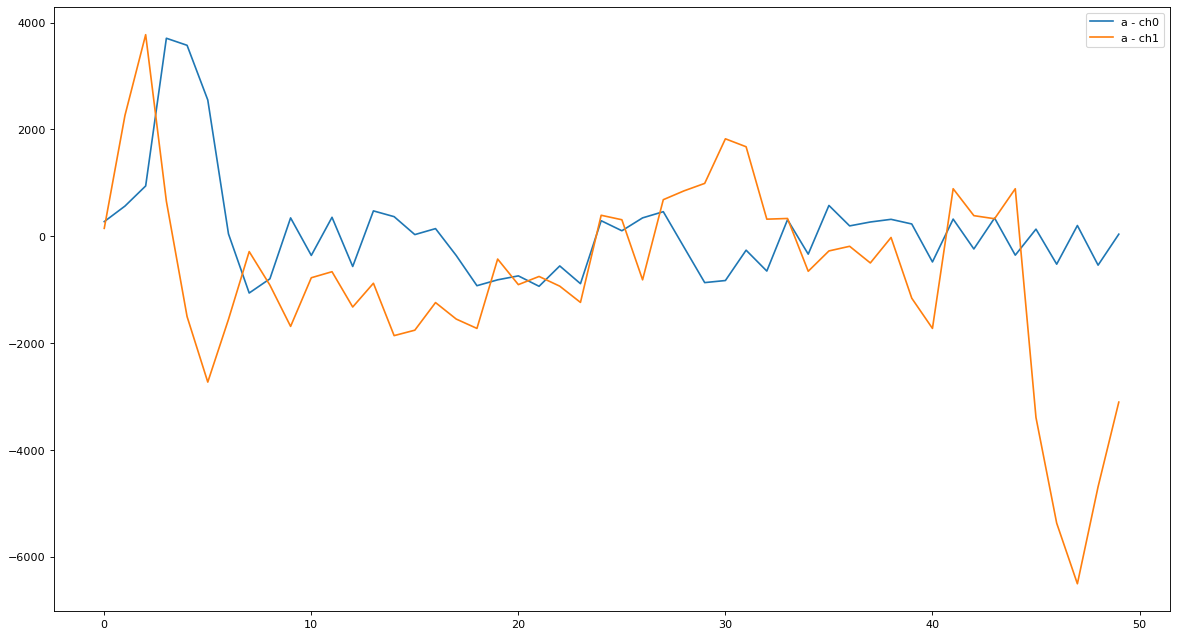

In [136]:
# plot
mp.figure(figsize=(18, 10), dpi=80)
for key, val in results.items():
    print(f"length ch0: {len(results[key]['channel_0'])}")
    print(f"length ch1: {len(results[key]['channel_1'])}")
    mp.plot(results[key]["channel_0"], label=f"{key} - ch0")
    mp.plot(results[key]["channel_1"], label=f"{key} - ch1")

mp.autoscale(True)
mp.legend()

In [ ]:
mp.figure(figsize=(18, 10), dpi=80)
mp.title("A - B")
mp.plot(np.array(results["a"]["channel_0"]) - np.array(results["b"]["channel_0"]), label="a - b - ch0")
mp.plot(np.array(results["a"]["channel_1"]) - np.array(results["b"]["channel_0"]), label="a - b - ch1")
mp.autoscale(True)
mp.grid()
mp.legend()

mp.figure(figsize=(18, 10), dpi=80)
mp.title("A + B")
mp.plot(np.array(results["a"]["channel_0"]) + np.array(results["b"]["channel_0"]), label="a + b - ch0")
mp.plot(np.array(results["a"]["channel_1"]) + np.array(results["b"]["channel_0"]), label="a + b - ch1")
mp.autoscale(True)
mp.grid()
mp.legend()

In [ ]:
import numpy as np

a = np.array(results["a"]["channel_0"]) + 1j * np.array(results["a"]["channel_1"])
b = np.array(results["b"]["channel_0"]) + 1j * np.array(results["b"]["channel_1"])

np.save("./data/cpmg_pap_a.npy", a)
np.save("./data/cpmg_pap_b.npy", b)